<a href="https://colab.research.google.com/github/SophiaVei/Walmart-sales-prediction/blob/main/Walmart_sales_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import necessary libraries and dataset

In [ ]:
# storing and anaysis
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from  IPython.display import display, HTML, display_html
%matplotlib inline
sns.set()

# Time
import datetime
from datetime import datetime

# Facebook Prophet
!pip install pystan~=2.14
!pip install fbprophet

# Stats tools
from statsmodels.tsa.stattools import adfuller # Dickey-Fuller test
from statsmodels.tsa.seasonal import seasonal_decompose # Moving Average
from statsmodels.tsa.stattools import acf, pacf # Autocorrelation and Partial Autocorrelation
from statsmodels.tsa.arima_model import ARIMA # AutoRegressive Integrated Moving Average

In [ ]:
from google.colab import files
uploaded = files.upload()
import io
walmart = pd.read_csv(io.BytesIO(uploaded['walmart_cleaned.csv']))

Saving walmart_cleaned.csv to walmart_cleaned.csv


In [ ]:
# Removes the NA's from the data
for name in walmart.columns:
  walmart[name] = walmart[name].fillna( value = 1e-10 )

## Data Visualization

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

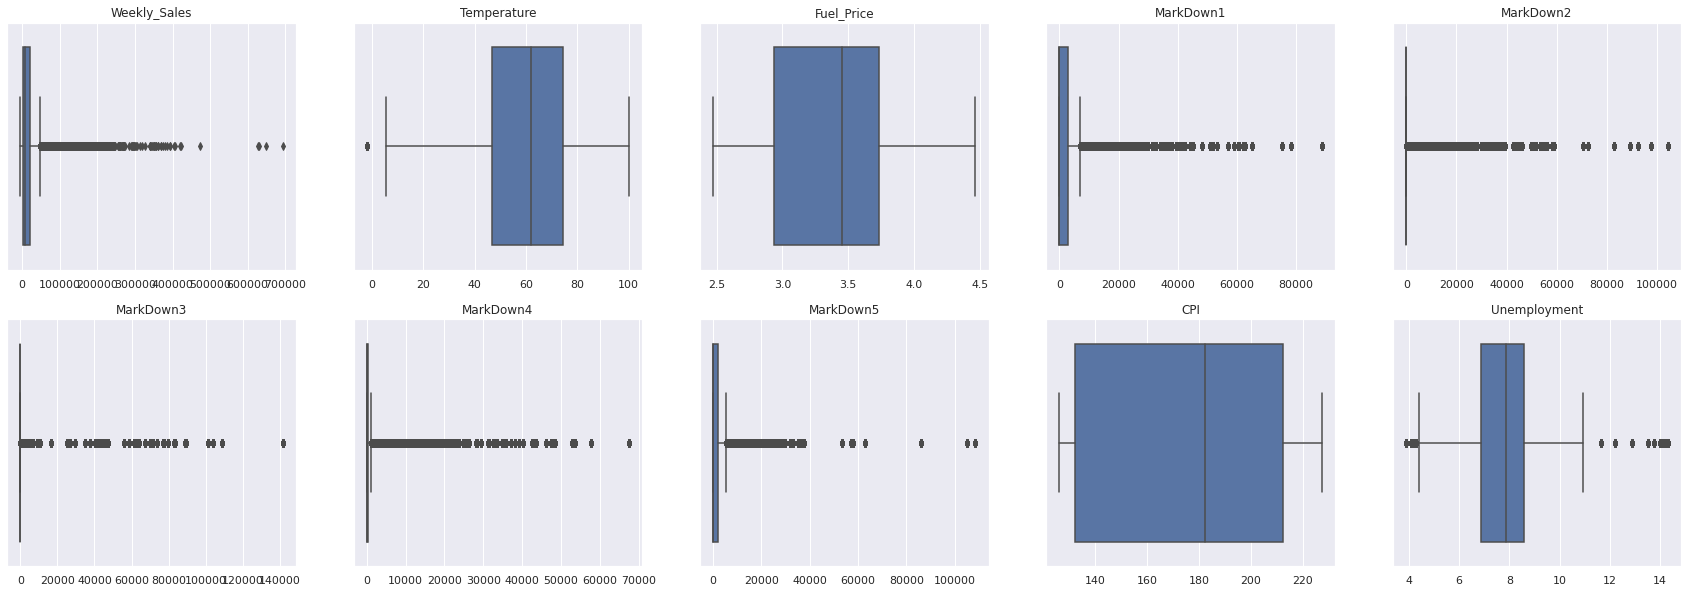

In [ ]:
# Boxplots
plt.figure(figsize=(30,10))
count = 1
for name in walmart.columns:
  if name == 'Weekly_Sales'  or name == 'Temperature' or name == 'Fuel_Price' or name == 'Unemployment' or name == 'CPI' or name == 'MarkDown1' or name == 'MarkDown2' or name == 'MarkDown3' or name == 'MarkDown4' or name == 'MarkDown5':
    plt.subplot(2,5,count)
    count += 1
    plot_me = walmart[name]
    plot_me = plot_me.to_numpy()
    plot_me = plot_me.astype(float)
    sns.boxplot(plot_me).set(title = name)
plt.show()
     

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-pack

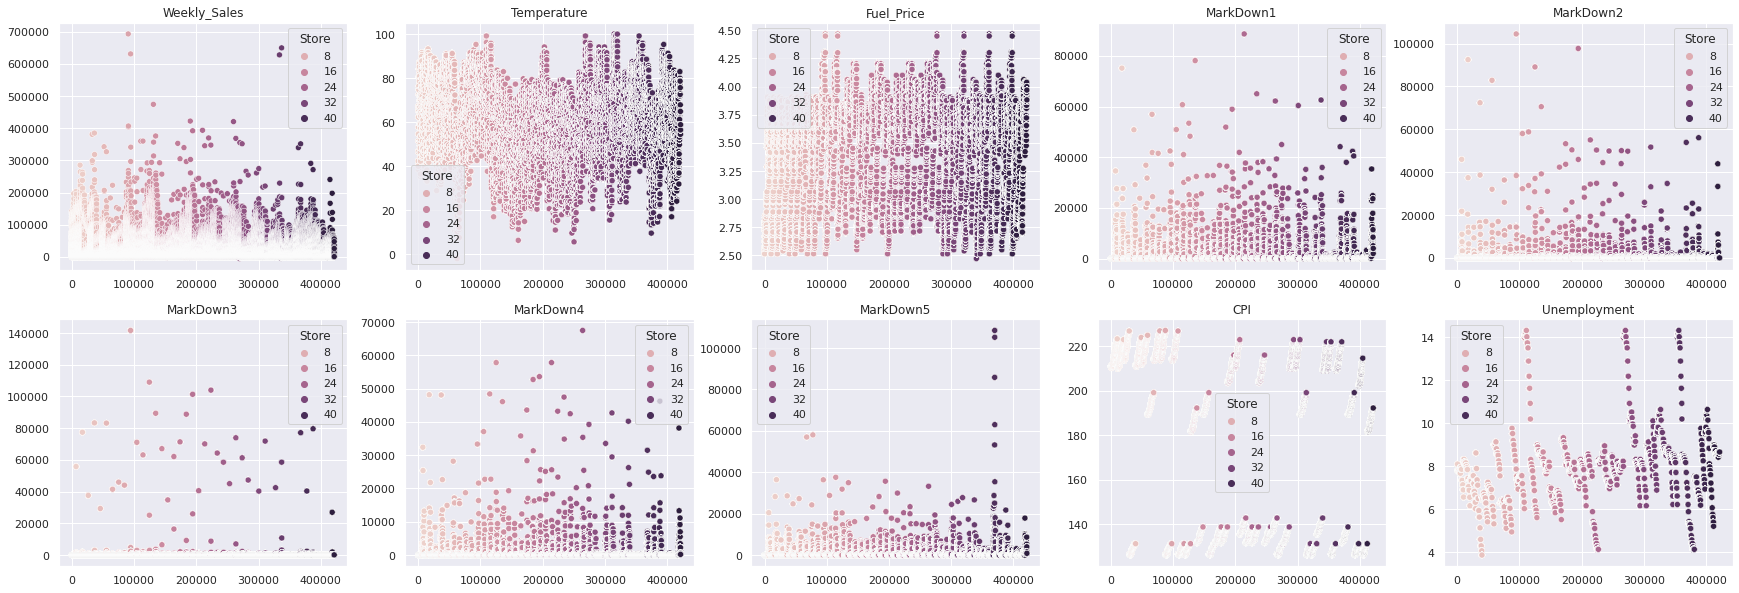

In [ ]:
# Scatter Plot With Color being the Stores
plt.figure(figsize=(30,10))
count = 1
for name in walmart.columns:
  if name == 'Weekly_Sales'  or name == 'Temperature' or name == 'Fuel_Price' or name == 'Unemployment' or name == 'CPI' or name == 'MarkDown1' or name == 'MarkDown2' or name == 'MarkDown3' or name == 'MarkDown4' or name == 'MarkDown5':
    plt.subplot(2,5,count)
    count += 1
    plot_me = walmart[name]
    plot_me = plot_me.to_numpy()
    plot_me = plot_me.astype(float)
    sns.scatterplot(range(len(plot_me)), plot_me, hue = walmart['Store']).set(title = name)
plt.show()


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-pack

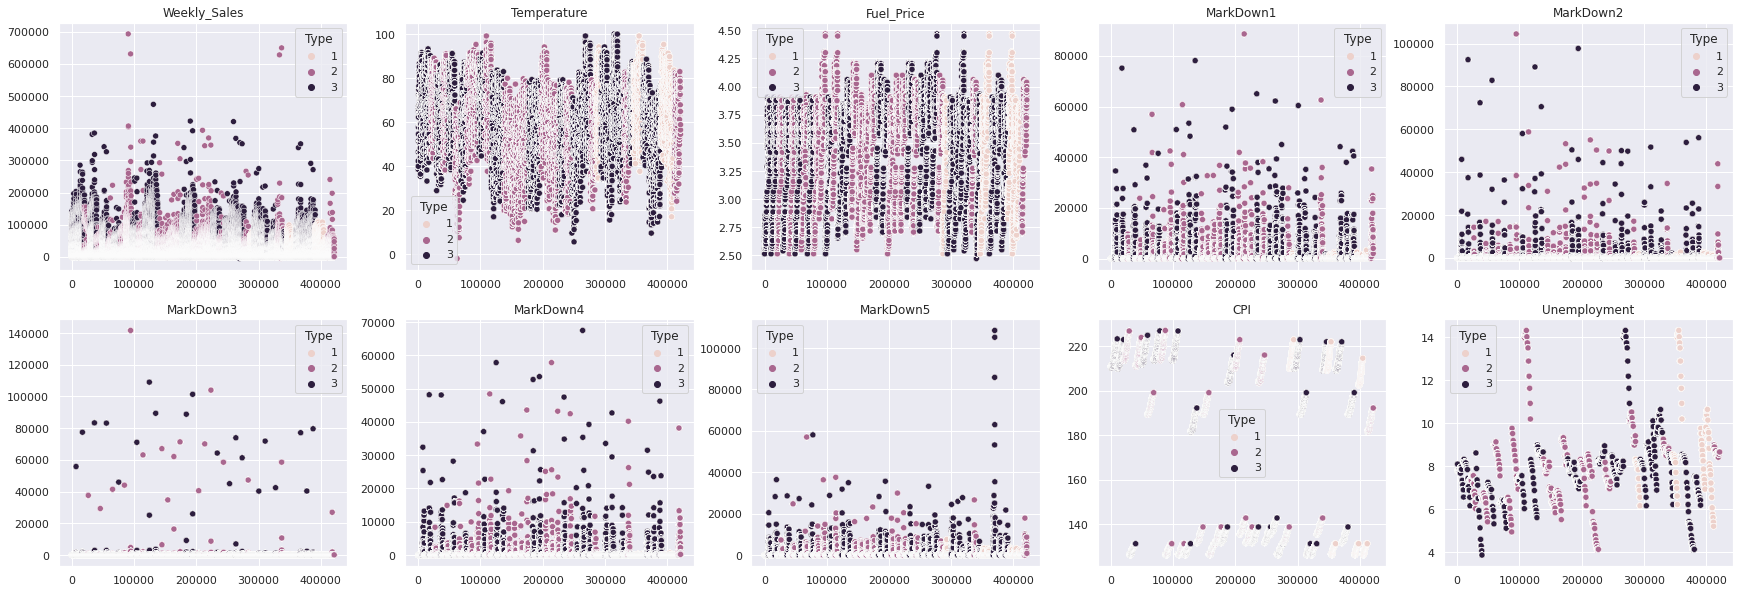

In [ ]:
# Scatter Plot with Color being the store type
plt.figure(figsize=(30,10))
count = 1
for name in walmart.columns:
  if name == 'Weekly_Sales'  or name == 'Temperature' or name == 'Fuel_Price' or name == 'Unemployment' or name == 'CPI' or name == 'MarkDown1' or name == 'MarkDown2' or name == 'MarkDown3' or name == 'MarkDown4' or name == 'MarkDown5':
    plt.subplot(2,5,count)
    count += 1
    plot_me = walmart[name]
    plot_me = plot_me.to_numpy()
    plot_me = plot_me.astype(float)
    sns.scatterplot(range(len(plot_me)), plot_me, hue = walmart['Type']).set(title = name)
plt.show()

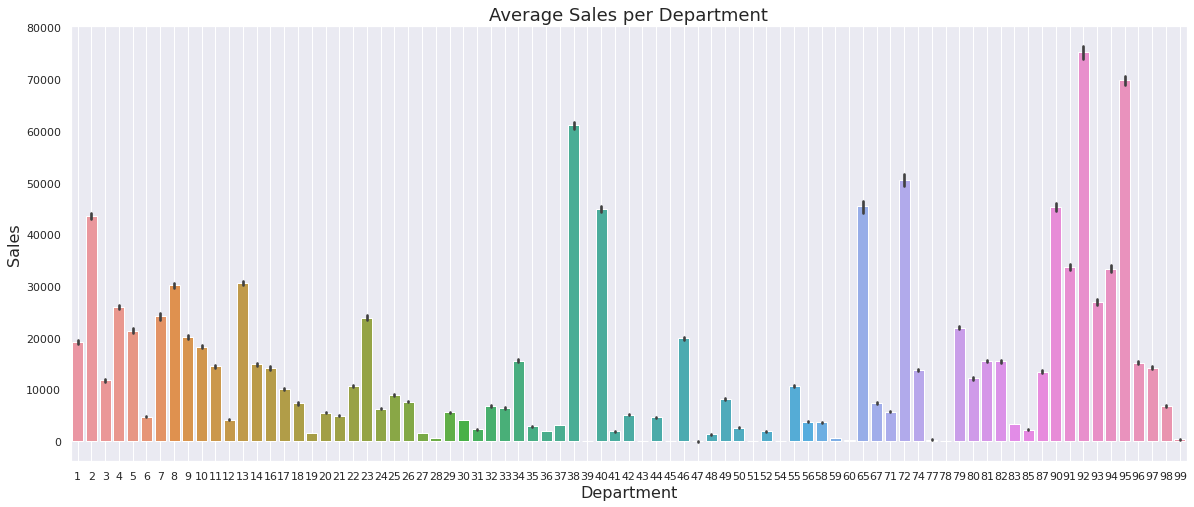

In [ ]:
#average sales per department plot (all stores)
plt.figure(figsize=(20,8))
sns.barplot(x='Dept',y='Weekly_Sales',data=walmart)
plt.grid()
plt.title('Average Sales per Department for all Stores', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Department', fontsize=16)
#plt.savefig('avg_sales_dep.png')
plt.show()

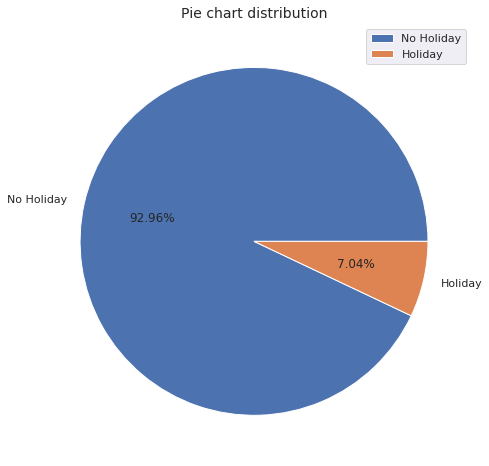

In [ ]:
#average sales according to whether it's holiday or not (all stores)
plt.figure(figsize=(8,8))
plt.pie(walmart['IsHoliday'].value_counts(),labels=['No Holiday','Holiday'],autopct='%0.2f%%')
plt.title("Pie chart distribution for all Stores",fontsize=14)
plt.legend()
#plt.savefig('holiday_distribution.png')
plt.show()

In [ ]:
average_sales = pd.DataFrame.mean(walmart['Weekly_Sales'])
print(average_sales)

15981.148913869585


In [ ]:
sum_sales = pd.DataFrame.sum(walmart['Weekly_Sales'])
num_of_stores = pd.DataFrame.max(walmart['Store'])
print(sum_sales/(num_of_stores*140))

1069392.531368254


## Create dataset as we want it. We chose to check Store 6 and Departments 5, 6, 92

In [ ]:
keep = ['Date',	'Store',	'Dept',	'Weekly_Sales', 'Type',	'Temperature', 'Fuel_Price',	'CPI',	'Unemployment']
df = walmart[keep]

for i in range(len(df['Weekly_Sales'])):
  if df['Weekly_Sales'][i] >= 100000:
    df['Weekly_Sales'][i] = pd.DataFrame.median(df['Weekly_Sales'])

sns.boxplot(df['Weekly_Sales'])

# Pulls out all the information about a single store (We are looking at Store 6)
Store = walmart['Store'] == 6
Store6 = walmart[Store]

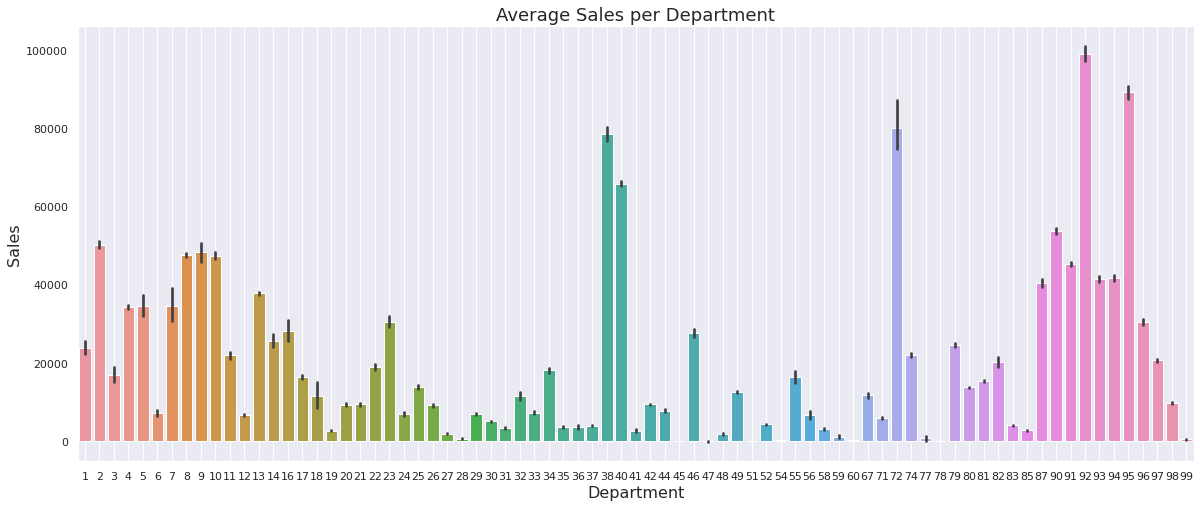

In [ ]:
#average sales per department plot (store 6)
plt.figure(figsize=(20,8))
sns.barplot(x='Dept',y='Weekly_Sales',data=Store6)
plt.grid()
plt.title('Average Sales per Department for Store 6', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Department', fontsize=16)
#plt.savefig('avg_sales_dep.png')
plt.show()

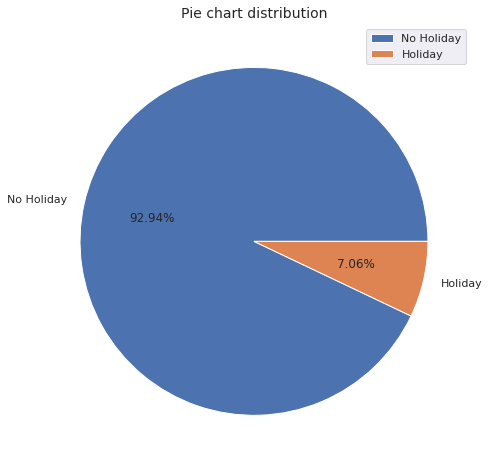

In [ ]:
#average sales according to whether it's holiday or not (store 6)
plt.figure(figsize=(8,8))
plt.pie(Store6['IsHoliday'].value_counts(),labels=['No Holiday','Holiday'],autopct='%0.2f%%')
plt.title("Pie chart distribution for Store 6",fontsize=14)
plt.legend()
#plt.savefig('holiday_distribution.png')
plt.show()

In [ ]:
# Change number of department below to check for specific department. We decided to check departments 5,6,92 of Store 6,
# since we want to check forecasts for a medium, small and large sales department accordingly

################### Pulls out all the information about a single department (We are looking at Department 5) ###################
#Department = Store6['Dept'] == 5
#Department5 = Store6[Department]
#Store6 = Department5
#df = Store6

################### Pulls out all the information about a single department (We are looking at Department 6) ###################
#Department = Store6['Dept'] == 6
#Department6 = Store6[Department]
#Store6 = Department6
#df = Store6

################### Pulls out all the information about a single department (We are looking at Department 92) ###################
Department = Store6['Dept'] == 92
Department92 = Store6[Department]
Store6 = Department92
df = Store6

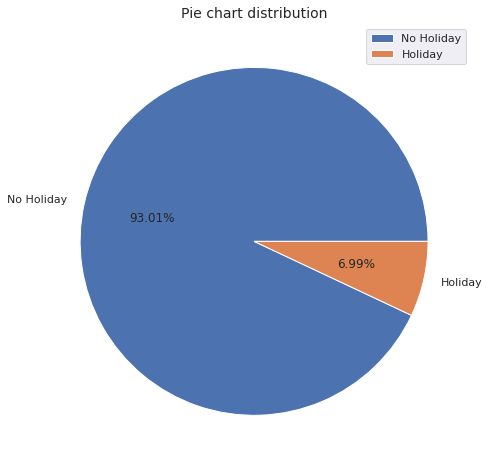

In [ ]:
#average sales according to whether it's holiday or not (department 5,6 or 92, according to which one we are checking)
plt.figure(figsize=(8,8))
plt.pie(df['IsHoliday'].value_counts(),labels=['No Holiday','Holiday'],autopct='%0.2f%%')
plt.title("Pie chart distribution for Department",fontsize=14)
plt.legend()
#plt.savefig('holiday_distribution.png')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-pack

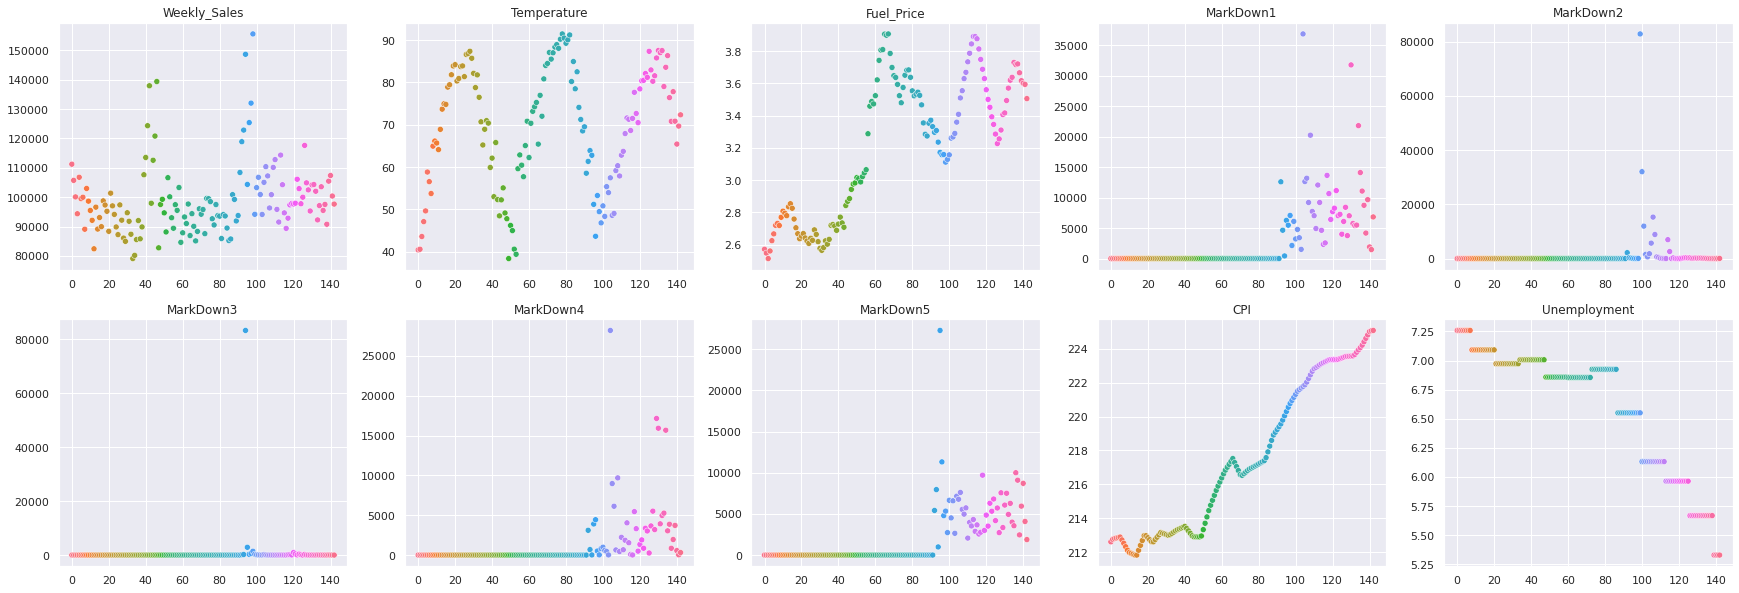

In [ ]:
# Scatter Plot with Color being the date
plt.figure(figsize=(30,10))
count = 1

for name in Store6.columns:
  if name == 'Weekly_Sales'  or name == 'Temperature' or name == 'Fuel_Price' or name == 'Unemployment' or name == 'CPI' or name == 'MarkDown1' or name == 'MarkDown2' or name == 'MarkDown3' or name == 'MarkDown4' or name == 'MarkDown5':
    plt.subplot(2,5,count)
    count += 1
    plot_me = Store6[name]
    plot_me = plot_me.to_numpy()
    plot_me = plot_me.astype(float)
    sns.scatterplot(range(len(plot_me)), plot_me, hue = Store6['Date'], legend=False).set(title = name)
    # sns.lineplot(range(len(plot_me)), plot_me, hue = Store1['Dept']).set(title = name)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


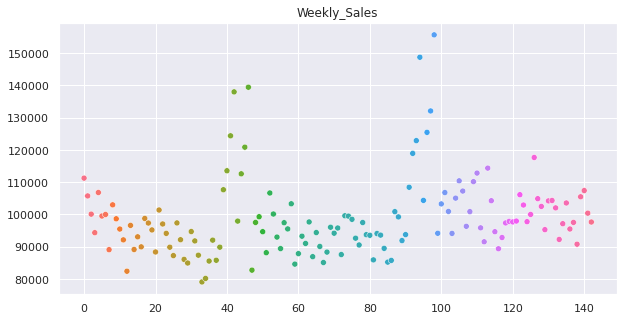

In [ ]:
plt.figure(figsize=(10,5))
count = 1

for name in Store6.columns:
  if name == 'Weekly_Sales':
    count += 1
    plot_me = Store6[name]
    plot_me = plot_me.to_numpy()
    plot_me = plot_me.astype(float)
    sns.scatterplot(range(len(plot_me)), plot_me, hue = Store6['Date'], legend=False).set(title = name)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


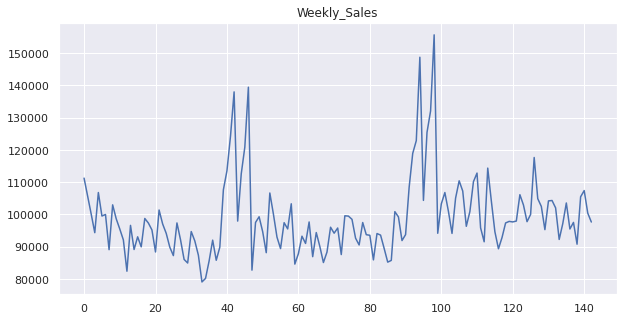

In [ ]:
plt.figure(figsize=(10,5))
count = 1

for name in Store6.columns:
  if name == 'Weekly_Sales':
    count += 1
    plot_me = Store6[name]
    plot_me = plot_me.to_numpy()
    plot_me = plot_me.astype(float)
    sns.lineplot(range(len(plot_me)), plot_me, legend= False).set(title = name)
plt.show()

##Formating the Data for Time Series analysis

In [ ]:
df = df.rename(columns = {'Date':'ds', 'Weekly_Sales':'ws'})
keep2 = ['ds', 'ws']
df_example = df[keep2]

##Visualization For Weekly Sales

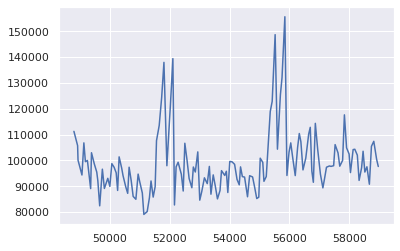

In [ ]:
f, ax = plt.subplots(1,1)
ax.plot(df_example['ws'])

In [ ]:
def test_stationarity(df, ts):
    """
    Test stationarity using moving average statistics and Dickey-Fuller test
    Source: https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/
    """
    
    # Determing rolling statistics
    rolmean = df[ts].rolling(window = 12, center = False).mean()
    rolstd = df[ts].rolling(window = 12, center = False).std()
    
    # Plot rolling statistics:
    orig = plt.plot(df[ts], 
                    color = 'blue', 
                    label = 'Original')
    mean = plt.plot(rolmean, 
                    color = 'red', 
                    label = 'Rolling Mean')
    std = plt.plot(rolstd, 
                   color = 'black', 
                   label = 'Rolling Std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation for %s' %(ts))
    plt.xticks(rotation = 45)
    plt.show(block = False)
    plt.close()


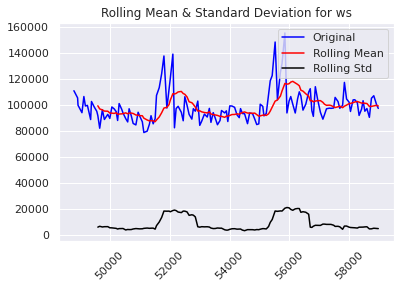

In [ ]:
# Plots the Data wit the Rolling Mean and Rolling Std
test_stationarity(df = df_example, ts ='ws') # Rolling mean and Rolling Std appear to be stationary

In [ ]:
def plot_transform(df, ts, ts_transform):
  f, ax = plt.subplots(1, 1)
  ax.plot(df[ts])
  ax.plot(df[ts_transform], color = 'red')

In [ ]:
df_example['ws_log'] = df_example['ws'].apply(lambda x: np.log(x))

<ipython-input-27-f09b88c0e952>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_example['ws_log'] = df_example['ws'].apply(lambda x: np.log(x))


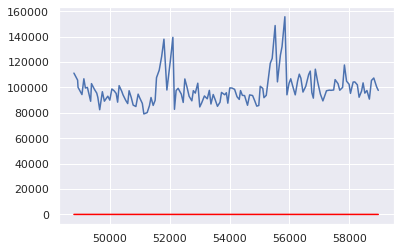

In [ ]:
plot_transform(df_example, 'ws', 'ws_log')

In [ ]:
df_example['ws_log_moving_avg'] = df_example['ws_log'].rolling(window =7, center = False).mean()

<ipython-input-29-796d40110218>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_example['ws_log_moving_avg'] = df_example['ws_log'].rolling(window =7, center = False).mean()


In [ ]:
df_example['ws_moving_avg']      = df_example['ws'].rolling(window = 7, center = False).mean()
df_example['ws_log_diff']        = df_example['ws_log'].diff()
df_example['ws_moving_avg_diff'] = df_example['ws'] - df_example['ws_moving_avg']
df_example['ws_ewma']            = df_example['ws'].ewm(halflife = 7, ignore_na = False, min_periods = 0, adjust = True).mean()
df_example['ws_log_ewma']        = df_example['ws_log'].ewm(halflife =7, ignore_na =False,min_periods=0, adjust=True).mean()
df_example['ws_log_ewma_diff']   = df_example['ws_log'] - df_example['ws_log_ewma']


df_example_trans = df_example.dropna()

<ipython-input-30-99f6536e58b0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_example['ws_moving_avg']      = df_example['ws'].rolling(window = 7, center = False).mean()
<ipython-input-30-99f6536e58b0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_example['ws_log_diff']        = df_example['ws_log'].diff()
<ipython-input-30-99f6536e58b0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

In [ ]:
df_example_trans['ws_log_ewma']=df_example_trans['ws_log'].ewm(halflife =7, ignore_na =False,min_periods=0, adjust=True).mean()
df_example_trans['ws_log_ewma_diff']=df_example_trans['ws_log']-df_example_trans['ws_log_ewma']

<ipython-input-31-307ad16ca123>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_example_trans['ws_log_ewma']=df_example_trans['ws_log'].ewm(halflife =7, ignore_na =False,min_periods=0, adjust=True).mean()
<ipython-input-31-307ad16ca123>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_example_trans['ws_log_ewma_diff']=df_example_trans['ws_log']-df_example_trans['ws_log_ewma']


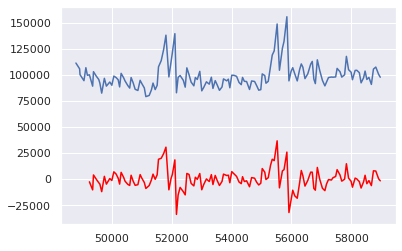

In [ ]:
# Minus the Moving Average
plot_transform(df_example, 'ws', 'ws_moving_avg_diff')

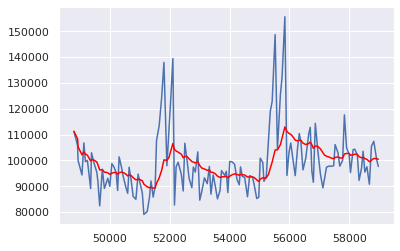

In [ ]:
# Expontential Weighted Moving Average
plot_transform(df_example, 'ws', 'ws_ewma')

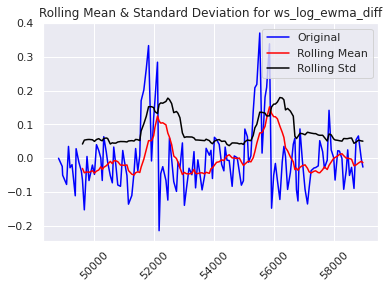

In [ ]:
# Difference in the Log of the Expontential Weighted Moving Average
test_stationarity(df_example, 'ws_log_ewma_diff')

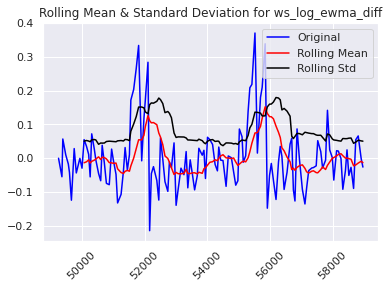

In [ ]:
# Difference in the Log of the Expontential Weighted Moving Average for the Transformation
test_stationarity(df_example_trans, 'ws_log_ewma_diff')

##Decomposition Analysis

In [ ]:
def plot_decomposition(df, ts, trend, seasonal, residual):
    
  f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (15, 5), sharex = True)

  ax1.plot(df[ts], label = 'Original')
  ax1.legend(loc = 'best')
  ax1.tick_params(axis = 'x', rotation = 45)

  ax2.plot(df[trend], label = 'Trend')
  ax2.legend(loc = 'best')
  ax2.tick_params(axis = 'x', rotation = 45)

  ax3.plot(df[seasonal],label = 'Seasonality')
  ax3.legend(loc = 'best')
  ax3.tick_params(axis = 'x', rotation = 45)

  ax4.plot(df[residual], label = 'Residuals')
  ax4.legend(loc = 'best')
  ax4.tick_params(axis = 'x', rotation = 45)
  plt.tight_layout()

  # plt.subtitle('Signal Decomposition of %s' %(ts), x = 0.5, y = 1.05, fontsize = 18)
  plt.show()

<ipython-input-37-0d2fb3848cf0>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition = seasonal_decompose(df_example_trans['ws_log'], freq = 52)
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


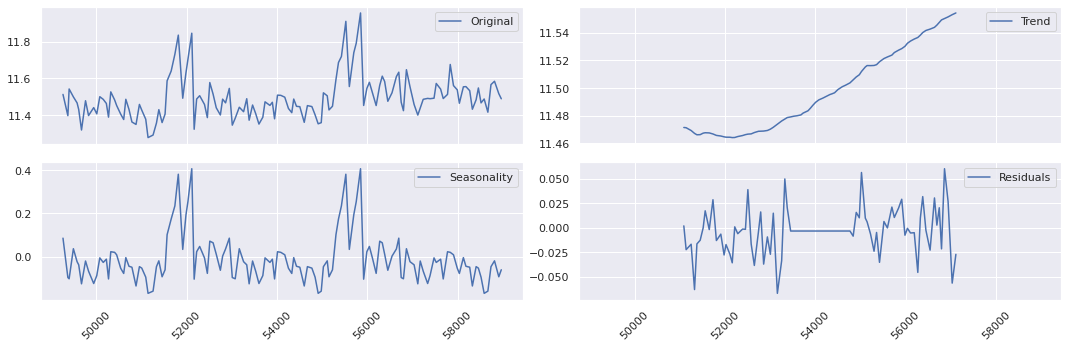

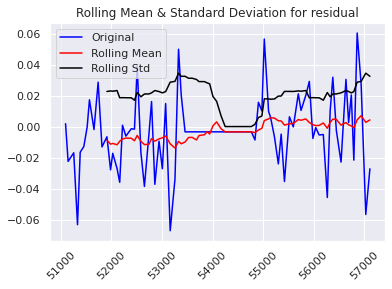

In [ ]:
decomposition = seasonal_decompose(df_example_trans['ws_log'], freq = 52)

df_example_trans.loc[:,'trend']    = decomposition.trend
df_example_trans.loc[:,'seasonal'] = decomposition.seasonal
df_example_trans.loc[:,'residual'] = decomposition.resid

plot_decomposition(df = df_example_trans, ts= 'ws_log', trend='trend', seasonal='seasonal', residual='residual')

test_stationarity(df_example_trans.dropna(), ts='residual')

##Arima

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecastin

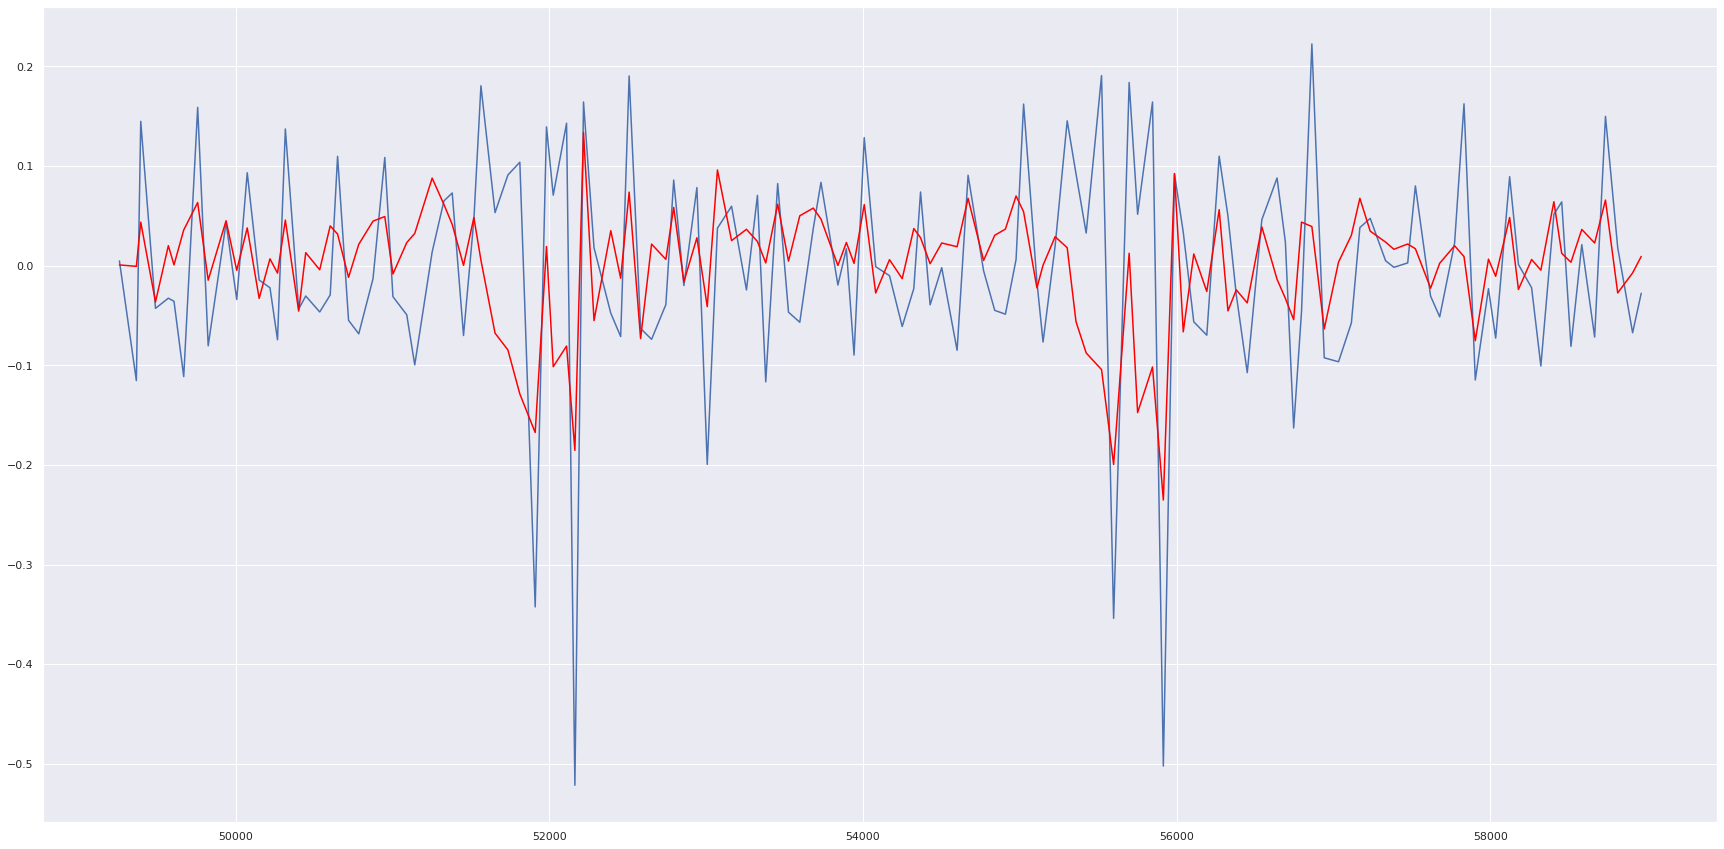

In [ ]:
def run_arima(df,ts,p,d,q):
  
  model=ARIMA(df[ts], order=(p,d,q))
  results_arima=model.fit(disp=-1)

  len_results = len(results_arima.fittedvalues)
  ts_modified = df[ts][-len_results:]

  rss  = sum((results_arima.fittedvalues - ts_modified)**2)
  rmse = np.sqrt(rss/ len(df[ts]))

  plt.figure(figsize=(30,15))
  plt.plot(df[ts])
  plt.plot(results_arima.fittedvalues, color='red')

  plt.show()

  return results_arima
     

model_AR = run_arima(df= df_example_trans, ts='ws_log_diff',p=2,d=0,q=2)

##Facebook Prophet

In [ ]:
def days_between(d1, d2):
  """ return the number of days between two different days """
  d1 = datetime.strptime(d1, "%Y-%m-%d")
  d2 = datetime.strptime(d2, "%Y-%m-%d")

  return abs((d2-d1).days+1)

In [ ]:

# Inputs for query

date_column = 'ds'
metric_column = 'ws'
table = df_example
start_training_date = '2010-02-05'
end_training_date = '2012-10-26'
start_forecasting_date = '2010-02-05'
end_forecasting_date = '2012-01-11'
year_to_estimate = '2011'

# Inputs for forecasting

# future_num_points
# If doing different time intervals, change future_num_points
future_num_points = 7

cap = None # 2e6

# growth: default = 'linear'
# Can also choose 'logistic'
growth = 'linear'

# n_changepoints: default = 25, uniformly placed in first 80% of time series
n_changepoints = 25 

# changepoint_prior_scale: default = 0.05
# Increasing it will make the trend more flexible
changepoint_prior_scale = 0.05 

# changpoints: example = ['2016-01-01']
changepoints = None 

# holidays_prior_scale: default = 10

holidays_prior_scale = 10 

# interval_width: default = 0.8
interval_width = 0.8 
mcmc_samples = 0

holidays = None

daily_seasonality = True

In [ ]:
df_prophet = df_example_trans[['ds','ws']]
df_prophet = df_prophet.reset_index()
df_prophet = df_prophet.rename(columns = {'ds':'ds','ws':'y'})
df_prophet['ds']=pd.to_datetime(df_prophet['ds'])
df_prophet['y']=pd.to_numeric(df_prophet['y'], errors='ignore')

In [ ]:
from fbprophet import Prophet
from pandas import DateOffset

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


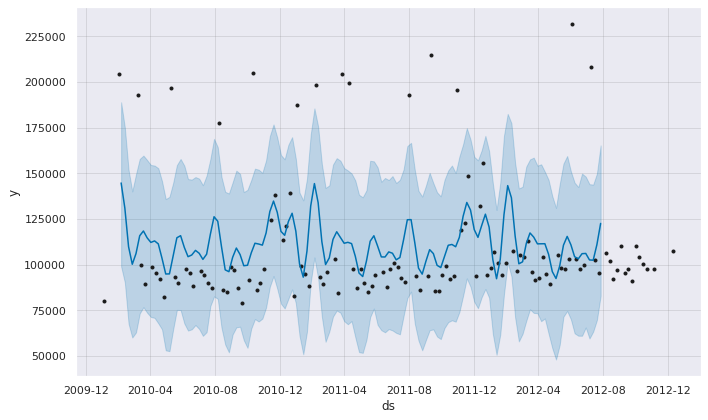

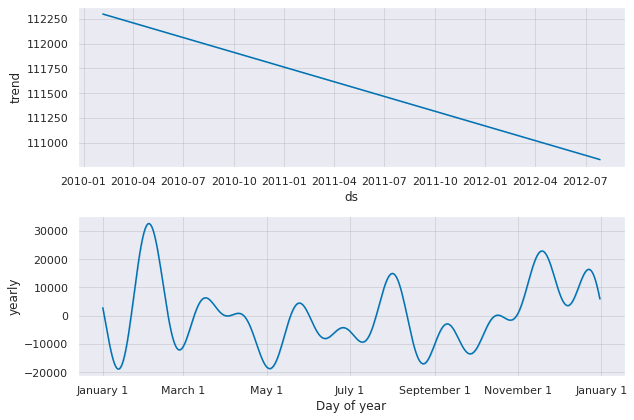

In [ ]:
def weekly_forecast(df, holidays, growth, n_changepoints=25, holidays_prior_scale=10, changepoint_prior_scale=0.05,
                    changepoints=None, interval_width=0.8, mcmc_samples=1, future_num_points=7,
                    daily_seasonality=True):
    df_c = df.copy()
    df_c['ds'] = df_c['ds'].dt.to_period("W").apply(lambda x: x.start_time)
    df_c = df_c.groupby('ds').sum().reset_index()
    m = Prophet(growth=growth,
                n_changepoints=n_changepoints,
                changepoint_prior_scale=changepoint_prior_scale,
                changepoints=changepoints,
                holidays=holidays,
                holidays_prior_scale=holidays_prior_scale,
                interval_width=interval_width,
                mcmc_samples=mcmc_samples,
                daily_seasonality=False)
    m.fit(df_c)
    future = m.make_future_dataframe(periods=future_num_points)
    future['ds'].iloc[0] = start_forecasting_date
    for i in range(1, len(future)):
      future['ds'].iloc[i] = future['ds'].iloc[i-1] + DateOffset(days=7)

    forecst = m.predict(future)

    m.plot(forecst)
    m.plot_components(forecst)

    return forecst


forecst = weekly_forecast(df_prophet, holidays, growth, n_changepoints, holidays_prior_scale,
                          changepoint_prior_scale, changepoints, interval_width, mcmc_samples, future_num_points)

In [ ]:
print(forecst)

            ds          trend    yhat_lower     yhat_upper    trend_lower  \
0   2010-02-05  112300.070327  98932.904246  188854.940152  112300.070327   
1   2010-02-12  112288.672878  90166.849980  174984.006069  112288.672878   
2   2010-02-19  112277.275430  67624.915141  151841.704226  112277.275430   
3   2010-02-26  112265.877982  60024.740658  140041.162552  112265.877982   
4   2010-03-05  112254.480534  62827.400328  149413.055342  112254.480534   
..         ...            ...           ...            ...            ...   
125 2012-06-29  110875.379233  65534.309287  148095.610032  110875.379233   
126 2012-07-06  110863.981541  59489.179636  143991.878840  110863.981541   
127 2012-07-13  110852.583848  63292.706818  143767.558819  110852.583848   
128 2012-07-20  110841.186155  69622.302016  149796.808210  110841.186155   
129 2012-07-27  110829.788463  82826.801243  165225.291408  110829.788463   

       trend_upper  additive_terms  additive_terms_lower  \
0    112300.070

In [ ]:
#store forecast results of department 5
#forecst.to_csv("forecast_results_store6_dep5.csv", index=False)

#store forecast results of department 6
#forecst.to_csv("forecast_results_store6_dep6.csv", index=False)

#store forecast results of department 92
forecst.to_csv("forecast_results_store6_dep92.csv", index=False)

##Calculate Metrics (from Prophet)

In [ ]:
def calculate_mape(y_true, y_pred):
    """ Calculate mean absolute percentage error (MAPE)"""
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def calculate_mpe(y_true, y_pred):
    """ Calculate mean percentage error (MPE)"""
    return np.mean((y_true - y_pred) / y_true) * 100

def calculate_mae(y_true, y_pred):
    """ Calculate mean absolute error (MAE)"""
    return np.mean(np.abs(y_true - y_pred)) * 100

def calculate_rmse(y_true, y_pred):
    """ Calculate root mean square error (RMSE)"""
    return np.sqrt(np.mean((y_true - y_pred)**2))

def print_error_metrics(y_true, y_pred):
    print('MAPE: %f'%calculate_mape(y_true, y_pred))
    print('MPE: %f'%calculate_mpe(y_true, y_pred))
    print('MAE: %f'%calculate_mae(y_true, y_pred))
    print('RMSE: %f'%calculate_rmse(y_true, y_pred))
    return

In [ ]:
print_error_metrics(y_true = df_prophet['y'], y_pred = forecst['yhat'])